In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
LayerivData = pd.read_excel('layeriv_regression_data.xls')
LayerivData

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
5,57,170.9
6,23,56.9
7,14,77.5
8,45,214.0
9,10,65.3


In [3]:
LayerivData.isnull().sum()

X    0
Y    0
dtype: int64

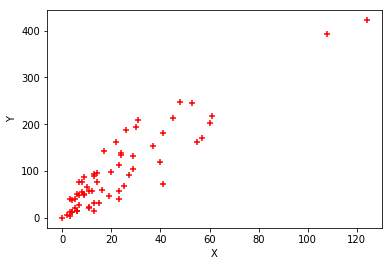

In [4]:
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(LayerivData.X,LayerivData.Y,color='red',marker='+')

In [5]:
X_data = LayerivData.drop('Y',axis='columns')
X_data
Y_data = LayerivData.Y

In [6]:
# X_train = X_data[int(len(X_data)*.05):]
# X_test = X_data[:int(len(X_data)*.05)]
# Y_train = LayerivData.Y[int(len(LayerivData.Y)*.05):]
# Y_test = LayerivData.Y[:int(len(LayerivData.Y)*.05)]

X_train = X_data.sample(frac=0.7,random_state=4538)
X_test = X_data.drop(X_train.index)
Y_train = Y_data.sample(frac=0.7,random_state=4538)
Y_test = Y_data.drop(Y_train.index)

X_test.index == Y_test.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [7]:

reg = linear_model.LinearRegression()
reg.fit(X_train,Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
reg.intercept_

21.05539512797749

In [9]:
reg.coef_

array([3.37777367])

In [10]:
reg.score(X_test,Y_test)

0.9600779054383368

In [11]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,reg.predict(X_test))

552.9370758338775

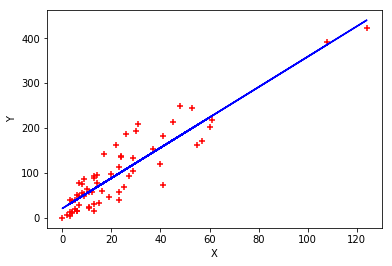

In [12]:
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X_data,LayerivData.Y,color='red',marker='+')  
plt.plot(X_data,reg.predict(X_data),color="blue")

In [13]:
# for i in range (4500,5000):
#     X_train = X_data.sample(frac=0.7,random_state=i)
#     X_test = X_data.drop(X_train.index)
#     Y_train = Y_data.sample(frac=0.7,random_state=i)
#     Y_test = Y_data.drop(Y_train.index)

#     reg = linear_model.LinearRegression()
#     a=reg.fit(X_train,Y_train)
    
#     print(i,"------->",reg.score(X_test,Y_test))
